### Support Vector Machines Example 3.1
In order to fit an SVM using a polynomial kernel, we once again use the **svm.SVC()** function. However, now we use a different 
value of the parameter kernel. To fit an SVM with a polynomial kernel we use **kernel='poly'**. We also use the degree argument to specify a degree for the polynomial kernel. We first generate some data with a non-linear class boundary, as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from SVM_def import SVM_def

# SVM_def is a class containing definitions used throughout this Chapter
svm_def = SVM_def()

# Create nonlinear data
n = 100
np.random.seed(2) 
# x from normal distribution  # y is 1 or 2
x = np.random.normal(scale = 1.0, size = (2*n, 2))
y = np.concatenate((np.ones(int(3/2*n)), 2*np.ones(int(1/2*n))))

x[:n, :] += 2
x[n:int(n*1.5), :] -= 2

Plotting the data makes it clear that the class boundary is indeed nonlinear

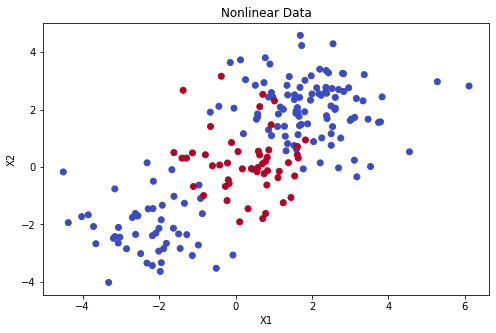

In [2]:
fig = plt.figure(figsize=[8, 5])

# Create scatter plot data
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(x[:,0], x[:,1], c=y, cmap=cm.coolwarm,  marker="o")

plt.xlabel("X1"), plt.ylabel("X2")
plt.title("Nonlinear Data")
plt.show()

The data is randomly split into training and testing groups. We then fit the training data using the **svm.SVC()** function with a polynomial kernel and $d = 2$:

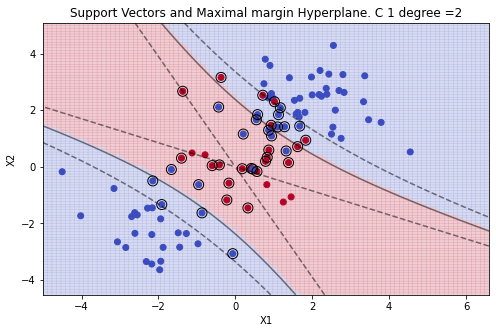

Number of Support Vectors:  39


In [3]:
""" First fit second order Polynomial """
# Create grid to evaluate model
xy, xx, yy = svm_def.create_grid(x, 100) 

# divide training data
np.random.seed(0) 
itrain = np.random.choice(200, 100, replace=False)

c, degree = 1, 2
clf_d2 = svm.SVC(kernel='poly', C=c, degree=degree)
clf_d2.fit(x[itrain], y[itrain])
Z_d2 = clf_d2.decision_function(xy).reshape(xx.shape)

# plot model
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, x[itrain, :], y[itrain], Z_d2, clf_d2, coloring=True)
title = ("Support Vectors and Maximal margin Hyperplane. C " + str(c) + 
         " degree =" + str(degree))
plt.title(title)
plt.show()
print("Number of Support Vectors: ", len(clf_d2.support_))


The fit shown is a substantial improvement over the linear support vector classifier. When $d = 1$, then the SVM reduces to the support vector classifier seen earlier in this chapter. The plot shows that the resulting SVM has a decidedly non-linear boundary. The different attributes of the **svm.SVC** fitted model give information on the fit. For example, the number of support vectors can be accessed through **support\_** and is 39.

We can see that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of over-fitting the data.

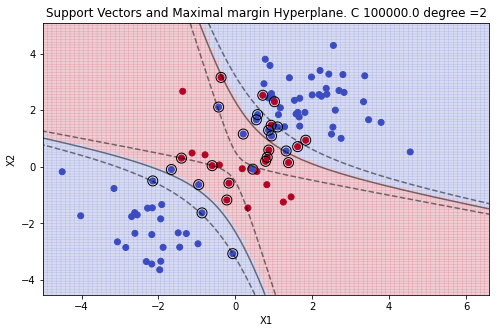

Number of Support Vectors:  28


In [4]:
""" Increased cost in fit second order Polynomial """
# New model
c, degree = 1e5, 2
clf_d2_c1e5 = svm.SVC(kernel='poly', C=c, degree=degree)
clf_d2_c1e5.fit(x[itrain], y[itrain])
Z_d2_c1e5 = clf_d2_c1e5.decision_function(xy).reshape(xx.shape)

# Create scatter plot data
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, x[itrain,:], y[itrain], Z_d2_c1e5, clf_d2_c1e5, 
                 coloring=True)
title = ("Support Vectors and Maximal margin Hyperplane. C " + str(c) 
         + " degree =" + str(degree))
plt.title(title)

plt.show()
print("Number of Support Vectors: ", len(clf_d2_c1e5.support_))

We can perform cross-validation using **GridSearchCV** to select the best choice of $d$ and cost for an SVM with a polynomial kernel:

In [5]:
""" Tune model """
# Set parameters to be tuned. Other options can be added
tune_parameters = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 100], 
                   'degree':[1, 2, 3, 4]}

# Tune SVM
clf_tune = GridSearchCV(svm.SVC(kernel='poly'), tune_parameters)
clf_tune.fit(x, y)

print("Best Parameters:\n", clf_tune.best_params_)
print("Mean scores:\n", clf_tune.cv_results_['mean_test_score'], 
      "\nStandard Deviation scores:\n", clf_tune.cv_results_['std_test_score'], 
      "\nRanking scores:\n", clf_tune.cv_results_['rank_test_score'])

Best Parameters:
 {'C': 100, 'degree': 2}
Mean scores:
 [0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.81  0.75  0.78
 0.75  0.885 0.75  0.84  0.75  0.91  0.75  0.865 0.75  0.905 0.75  0.87
 0.75  0.915 0.75  0.875] 
Standard Deviation scores:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.07348469 0.         0.06
 0.         0.01224745 0.         0.04062019 0.         0.0254951
 0.         0.0254951  0.         0.01870829 0.         0.0244949
 0.         0.03       0.         0.01581139] 
Ranking scores:
 [11 11 11 11 11 11 11 11 11  9 11 10 11  4 11  8 11  2 11  7 11  3 11  6
 11  1 11  5]


Therefore, the best choice of parameters involves **cost=100** and **d=2**. We can view the test set predictions for this model by applying the **predict()** 
function to the data.

In [8]:
""" Predict scores """
# Optimal parameter
clf_opt = svm.SVC(kernel='poly', C=clf_tune.best_params_['C'], 
                  degree=clf_tune.best_params_['degree'])
clf_opt.fit(x[itrain], y[itrain])
Z_opt = clf_opt.decision_function(xy).reshape(xx.shape)

# Test dataset
xtest = np.delete(x, itrain, axis=0)
ytest = np.delete(y, itrain, axis=0)

# Prediction
ypred_opt = clf_opt.predict(xtest)
tab_opt = svm_def.table_scores(ypred_opt, ytest)

print("Optimal C = ", clf_tune.best_params_['C'], " scores:\n", tab_opt)
print("Number of Support Vectors: ", len(clf_opt.support_))

Optimal C =  100  scores:
           Pred 1.0  Pred 2.0
True 1.0      75.0       0.0
True 2.0      25.0       0.0
Number of Support Vectors:  53


 $8\%$ of the test observations are misclassified by this SVM.

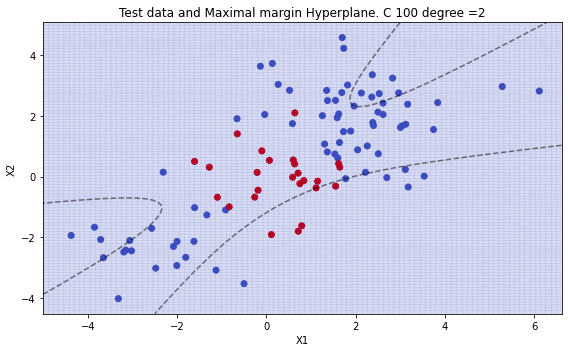

In [9]:
""" Plots """
fig = plt.figure(figsize=[8, 5])

# Create scatter plot data
ax = fig.add_subplot(1, 1, 1) 
svm_def.svm_plot(ax, xtest, ytest, Z_opt, clf_opt, coloring=True, 
                 suppvector=False)

title = ("Test data and Maximal margin Hyperplane. C " + 
         str(clf_tune.best_params_['C']) + " degree =" + 
         str(clf_tune.best_params_['degree']))
plt.title(title)
plt.tight_layout()
plt.show()